In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(100) #seed값 고정
print(tf.__version__)

2.4.1


In [2]:
#로지스틱 회귀분석 테스트
x_train = [   # 분류를 하자면
    [1., 2.], # 일 떼, 0
    [2., 3.], # 일 때, 0
    [3., 1.], # 일 때, 0
    [4., 3.], # 일 때, 1
    [5., 3.], # 일 때, 1
    [6., 2.]  # 일 때, 1
]

y_train = [
    [0.],
    [0.],
    [0.],
    [1.],
    [1.],
    [1.]
]


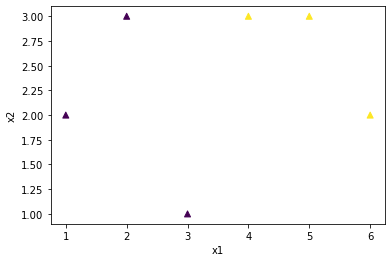

In [3]:
x1 = [x[0] for x in x_train] #x의 첫번째 열
x2 = [x[1] for x in x_train] #x의 두번째 열

colors = [int(y[0]%2) for y in y_train] #y_train에서 값을 꺼내 y에 넣고 그 값을 2로 나눈것

plt.scatter(x1,x2, c = colors, marker='^')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [4]:
x_test = [[5.,2.]]
y_test = [[1.]]

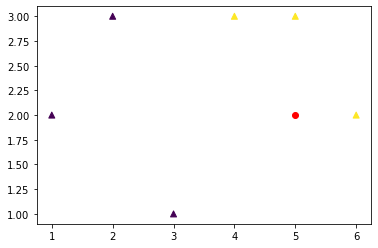

In [5]:
plt.scatter(x1,x2, c= colors,marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")
#red 테스트 값을 분류하면, 보라색이나올까? 노란색이나올까?
#-> 우리가 해야할일!

In [6]:
#batch는 한번에 학습시킬 사이즈를 파악하는 것
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [7]:
#데이터 형태부터 짜자

W= tf.Variable(tf.zeros([2,1]), name='weight')
b= tf.Variable(tf.zeros([1]), name='bias')

In [8]:
#시그모이드 함수 적용, 0과 1구분 용도
def logistic_regression(features):
    hypothesis = tf.divide(1.,1+tf.exp(tf.matmul(features,W)+b))
    return hypothesis

In [9]:
#새로운 cost function
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-labels * tf.math.log(logistic_regression(features))-(1-labels)*tf.math.log(1-logistic_regression(features)))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [10]:
#위 결과값을 0.5기준으로 넘으면 1, 넘지 못하면 0이되도록 분류
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    
    return accuracy

In [13]:
#gradientTape로 경사값 계산

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features,labels)
    return tape.gradient(loss_value,[W,b])

In [14]:
#for문 학습
for step in range(1000+1):
    for features, labels in iter(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W,b]))
        
        if step % 100 ==0:
              print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
